# Programming-for-DataAnalysis

## Practical Assignment for Semester 2 - 2019¶

### Student Name : Sasikala Varatharajan

### Student Number : G00376470



### About Project 

For this project a data set must be created by simulating a real-world phenomenon. As I am interested in walking with my family I would like to investigate the factors that could affect the exercise or walking timing of a normal person.  
It was suggested to use the numpy.random package for this purpose and Python programming for modeling and synthesise the data. 

This project includes:

• Real-world phenomenon that can be measured and for which could collect at least one-hundred data points across at least four different variables.

• Investigation of the types of variables involved, their likely distributions, and their relationships with each other.

• Simulation of a data set as closely matching their properties as possible.

• Description of the research and implemention of the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

### About the Dataset

Dataset Name: Walking club

Since walking is one of the common exercise people at different age will go for walk for certain limit of time in a week. We can actually measure it using the people's age, sex, working and non-working, morning or evening, etc. This could also affect by weather condition as we are living in Ireland we can expect rain at any time. We also have very short day time during winter time and this could also affect the walking timing. 

But in order to make it simple I would like to findout how rainfall and weather condition affects the number of walking people in a small town. For this model I am using the data for Monaghan town and I am using the real world data for rainfall and temparature. For other data like no.of people walking during weekdays and weekends I am using my assemption to generate the data.

#### Variables:

Season : Four different Seasons in Ireland is playing a big role in walking outside as this could affect people's mood. 
Daytype: Dry or Wet days
Timing: Morning or Evening
Weather :Rainy or Sunny 



In [1]:
# This code imports python libraries.

# import numpy for use of arrays\n",
import numpy as np
# import pandas to use DataFrames
import pandas as pd
# import seaborn for ploting
import seaborn as sns
# import matplotlib pyplot for ploting
import matplotlib.pyplot as plt

In [2]:
# Code to creates data points for each season in the year

# Assuming that number of data points for each season is 90 [Approx 90 days for 3 months]
dp_season = 90

# Create list with same amount of data points for each season. Code adpted from
# https://stackoverflow.com/questions/3459098/create-list-of-single-item-repeated-n-times/3459140#3459140
ds_seasons = ["winter"]*dp_season + ["spring"]*dp_season + ["summer"]*dp_season + ["autumn"]*dp_season

# Create dataframe 'df_Walking_Club' for storing dataset. 
df_Walking_Club = pd.DataFrame(ds_seasons, columns =['ds_seasons'])

# Print Title
print('\nFirst 5 lines of dataset "Walking_Club"')
# Display first 5 lines of dataframe df_Walking_Club
df_Walking_Club.head()


First 5 lines of dataset "Walking_Club"


,ds_seasons
0,winter
1,winter
2,winter
3,winter
4,winter


In [3]:
ls_weather = ['dry', 'rain', 'wet']

# Print Title
print('\nList of possible weather types')
# Display list of rainy weather types
ls_weather


List of possible weather types


['dry', 'rain', 'wet']

In [4]:
# Creates dataframe matrix of average monthly weather data

# Average weather data for Monaghan, Ireland. 
# Rainfall and weather data for Monaghan adapted from
# https://data.gov.ie/dataset/monaghan-knockroe-rainfall-data &
# https://en.climate-data.org/europe/ireland/monaghan/monaghan-11695/

rain_days_month = [26, 17, 20, 21, 13, 9, 11, 24, 17, 17, 21, 20]
wet_days_month = [22, 14, 13, 14, 10, 6, 7, 18, 12, 9, 17, 17]
days_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
mm_rain_month = [201.4, 80.5, 62.6, 61.7, 46, 80.6, 49.1, 92.6, 44.8, 30.7, 124.8, 103]
min_temp = [1.2, 1.2, 2.3, 3.6, 6.2, 8.9, 10.6, 10.2, 8.7, 6.6, 3.1, 2.1]
max_temp = [6.6, 7 ,9.1, 11.6, 14.5, 17.3, 18.5, 18.2, 16.1, 13, 9, 7.4]

# Create dataframe with rain data. Code adapted from
# https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/
df_Average_monthly_weather = pd.DataFrame(list(zip(rain_days_month, wet_days_month, days_month, mm_rain_month, min_temp, max_temp)), 
                    index =['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                   columns=['rain_days_month', 'wet_days_month', 'days_month', 'mm_rain_month', 'min_temp', 'max_temp'])

# Calculate proportion of rain fall and wet days in a month
df_Average_monthly_weather['rain_month_proportion'] = df_Average_monthly_weather.apply(lambda row: np.round(row.rain_days_month/row.days_month,3), axis=1)
df_Average_monthly_weather['wet_month_proportion'] = df_Average_monthly_weather.apply(lambda row: np.round(row.wet_days_month/row.days_month,3), axis=1)

# Print data from dataframe
print('\nMonthly average weather data for Monaghan Town')
df_Average_monthly_weather


Monthly average weather data for Monaghan Town


,rain_days_month,wet_days_month,days_month,mm_rain_month,min_temp,max_temp,rain_month_proportion,wet_month_proportion
Jan,26,22,31,201.4,1.2,6.6,0.839,0.710
Feb,17,14,28,80.5,1.2,7.0,0.607,0.500
Mar,20,13,31,62.6,2.3,9.1,0.645,0.419
Apr,21,14,30,61.7,3.6,11.6,0.700,0.467
May,13,10,31,46.0,6.2,14.5,0.419,0.323
Jun,9,6,30,80.6,8.9,17.3,0.300,0.200
Jul,11,7,31,49.1,10.6,18.5,0.355,0.226
Aug,24,18,31,92.6,10.2,18.2,0.774,0.581
Sep,17,12,30,44.8,8.7,16.1,0.567,0.400
Oct,17,9,31,30.7,6.6,13.0,0.548,0.290


In [5]:
# Find weather types using the list values for weather 
# for each data point in dataframe 'df_Walking_Club'

# Set list of months in each season
winter = ['Nov', 'Dec', 'Jan']
spring = ['Feb', 'Mar', 'Apr']
summer = ['May', 'Jun', 'Jul']
autumn = ['Aug', 'Sep', 'Oct']

# Function to predict month from a list of months in a given season
def Find_Month(a):
    # Documentation string
    """Returns a random choice of month within a given season"""
    
    # Check for winter season
    if a == 'winter':
        # Set season to winter list
        season = winter
    
    # Check for spring season    
    elif a == 'spring':
        # Set season to spring list
        season = spring
    
    # Check for summer season
    elif a == 'summer':
        # Set season to summer list
        season = summer
    
    # Otherwise season is autumn
    else:
        # Set season to autumn list
        season = autumn          
    
    # Return a month choosen randomly with uniform distribution within a given season list
    return np.random.choice(a=season)

# Apply the function 'Find_Month' to each row in dataframe 'df_Walking_Club'
df_Walking_Club["month"] = df_Walking_Club.apply(lambda row: Find_Month(row.ds_seasons), axis=1)


# Function to predict weather based on month
def weather_type(Month):
    # Documentation string
    """Returns a choice of either 'dry' or 'wet' based on 
            mean number of day with rain in a given month"""
    
    # Select proportion of days with rain in a given month in
    # DataFrame 'df_Walking_Club' based on column and row index. Code adapted from 
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
    weather = df_Average_monthly_weather.rain_month_proportion.loc[str(Month)]
    
    # Return a weather type based on amount of rain in month
    return np.random.choice(a=['dry',  'rain'], p=[(1-weather), weather])

# Apply the function 'df_Walking_Club' to each row in dataframe 'park'
df_Walking_Club["weather"] = df_Walking_Club.apply(lambda row: weather_type(row.month), axis=1)


# Function to predict weather based on month
def day_type(Month):
    # Documentation string
    """Returns a choice of either 'dry' or 'rain' based on 
            mean number of day with rain in a given month"""
    
    # Select proportion of days with rain in a given month in
    # DataFrame 'df_Walking_Club' based on column and row index. Code adapted from 
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
    Day = df_Average_monthly_weather.wet_month_proportion.loc[str(Month)]
    
    # Return a weather type based on amount of rain in month
    return np.random.choice(a=['dry',  'wet'], p=[(1-Day), Day])

# Apply the function 'df_Walking_Club' to each row in dataframe 'park'
df_Walking_Club["Day"] = df_Walking_Club.apply(lambda row: day_type(row.month), axis=1)



# Print Title
print('\nFirst 5 lines of dataset "df_Walking_Club"')
# Display first 5 lines of dataframe 'df_Walking_Club'
df_Walking_Club.head()


First 5 lines of dataset "df_Walking_Club"


,ds_seasons,month,weather,Day
0,winter,Jan,rain,dry
1,winter,Jan,rain,wet
2,winter,Jan,rain,wet
3,winter,Dec,rain,dry
4,winter,Nov,rain,wet


In [6]:
# Print Title
print('\nDaily summary of weather and months in dataset "df_Walking_Club"')
# Display daily summary of weather and months
# Code adapted from https://dfrieds.com/data-analysis/crosstabs-python-pandas
pd.crosstab(index=df_Walking_Club['Day'], columns=df_Walking_Club['month'], margins=True)


Daily summary of weather and months in dataset "df_Walking_Club"


month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,All
Day,,,,,,,,,,,,,
dry,16,13,16,13,9,19,24,11,25,18,19,20,203
wet,15,20,13,16,18,9,6,19,7,16,9,9,157
All,31,33,29,29,27,28,30,30,32,34,28,29,360


In [7]:
# Print Title
print('\nDaily summary of weather and months in dataset "df_Walking_Club"')
# Display daily summary of weather and months
# Code adapted from https://dfrieds.com/data-analysis/crosstabs-python-pandas
pd.crosstab(index=df_Walking_Club['weather'], columns=df_Walking_Club['month'], margins=True)


Daily summary of weather and months in dataset "df_Walking_Club"


month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,All
weather,,,,,,,,,,,,,
dry,11,5,10,9,7,19,21,9,19,13,14,12,149
rain,20,28,19,20,20,9,9,21,13,21,14,17,211
All,31,33,29,29,27,28,30,30,32,34,28,29,360


In [8]:
# Display df_Walking_Club 
# Code adapted from https://stackoverflow.com/a/39923958
print(df_Walking_Club.to_string())

    ds_seasons month weather  Day
0       winter   Jan    rain  dry
1       winter   Jan    rain  wet
2       winter   Jan    rain  wet
3       winter   Dec    rain  dry
4       winter   Nov    rain  wet
5       winter   Nov     dry  dry
6       winter   Dec    rain  dry
7       winter   Jan    rain  wet
8       winter   Nov    rain  dry
9       winter   Nov     dry  wet
10      winter   Nov     dry  dry
11      winter   Dec    rain  dry
12      winter   Jan    rain  dry
13      winter   Jan     dry  wet
14      winter   Nov    rain  dry
15      winter   Jan     dry  wet
16      winter   Nov     dry  wet
17      winter   Dec    rain  dry
18      winter   Nov    rain  dry
19      winter   Dec    rain  wet
20      winter   Jan    rain  wet
21      winter   Nov     dry  dry
22      winter   Nov    rain  wet
23      winter   Jan    rain  wet
24      winter   Jan    rain  wet
25      winter   Nov    rain  wet
26      winter   Dec     dry  wet
27      winter   Nov     dry  dry
28      winter

In [9]:
print(df_Walking_Club.to_string())

    ds_seasons month weather  Day
0       winter   Jan    rain  dry
1       winter   Jan    rain  wet
2       winter   Jan    rain  wet
3       winter   Dec    rain  dry
4       winter   Nov    rain  wet
5       winter   Nov     dry  dry
6       winter   Dec    rain  dry
7       winter   Jan    rain  wet
8       winter   Nov    rain  dry
9       winter   Nov     dry  wet
10      winter   Nov     dry  dry
11      winter   Dec    rain  dry
12      winter   Jan    rain  dry
13      winter   Jan     dry  wet
14      winter   Nov    rain  dry
15      winter   Jan     dry  wet
16      winter   Nov     dry  wet
17      winter   Dec    rain  dry
18      winter   Nov    rain  dry
19      winter   Dec    rain  wet
20      winter   Jan    rain  wet
21      winter   Nov     dry  dry
22      winter   Nov    rain  wet
23      winter   Jan    rain  wet
24      winter   Jan    rain  wet
25      winter   Nov    rain  wet
26      winter   Dec     dry  wet
27      winter   Nov     dry  dry
28      winter

In [10]:
#df_WalkingClub = df_Walking_Club.append(dict(zip(df_Walking_Club.columns, Age)), ignore_index=True)

In [11]:
#print(df_WalkingClub.to_string())


In [12]:
Town_Population = 60000
no_of_walkers = 0

Age_15_25 = 0.20 * Town_Population
Age_26_40 = 0.20 * Town_Population
Age_41_50 = 0.30 * Town_Population
Age_above_50 = 0.20 * Town_Population


def Find_walkers(season, weather, day):

  # Check for winter season
    if season == 'winter':
        if weather == 'rain' and day == 'wet':
            no_of_walkers = (Age_15_25 * 0.25) + (Age_26_40 * 0.20) + (Age_41_50 * 0.15) + (Age_above_50 * 0.0)
        elif weather == 'rain' and day == 'dry':
            no_of_walkers = (Age_15_25 * 0.35) + (Age_26_40 * 0.25) + (Age_41_50 * 0.20) + (Age_above_50 * 0.3)
        elif weather == 'dry' and day == 'wet':
            no_of_walkers = (Age_15_25 * 0.40) + (Age_26_40 * 0.30) + (Age_41_50 * 0.25) + (Age_above_50 * 0.4)
        elif weather == 'dry' and day == 'dry':
            no_of_walkers = (Age_15_25 * 0.50) + (Age_26_40 * 0.40) + (Age_41_50 * 0.30) + (Age_above_50 * 0.6)  
    # Check for spring season    
    elif season == 'spring':
        if weather == 'rain' and day == 'wet':
            no_of_walkers = (Age_15_25 * 0.40) + (Age_26_40 * 0.50) + (Age_41_50 * 0.40) + (Age_above_50 * 0.5)
        elif weather == 'rain' and day == 'dry':
            no_of_walkers = (Age_15_25 * 0.45) + (Age_26_40 * 0.55) + (Age_41_50 * 0.45) + (Age_above_50 * 0.6)
        elif weather == 'dry' and day == 'wet':
            no_of_walkers = (Age_15_25 * 0.50) + (Age_26_40 * 0.60) + (Age_41_50 * 0.50) + (Age_above_50 * 0.8)
        elif weather == 'dry' and day == 'dry':
            no_of_walkers = (Age_15_25 * 0.60) + (Age_26_40 * 0.65) + (Age_41_50 * 0.60) + (Age_above_50 * 0.10)  
    # Check for summer season
    elif season == 'summer':
        if weather == 'rain' and day == 'wet':
            no_of_walkers = (Age_15_25 * 0.75) + (Age_26_40 * 0.55) + (Age_41_50 * 0.30) + (Age_above_50 * 0.10)
        elif weather == 'rain' and day == 'dry':
            no_of_walkers = (Age_15_25 * 0.80) + (Age_26_40 * 0.60) + (Age_41_50 * 0.35) + (Age_above_50 * 0.15)
        elif weather == 'dry' and day == 'wet':
            no_of_walkers = (Age_15_25 * 0.80) + (Age_26_40 * 0.60) + (Age_41_50 * 0.32) + (Age_above_50 * 0.12)
        elif weather == 'dry' and day == 'dry':
            no_of_walkers = (Age_15_25 * 0.85) + (Age_26_40 * 0.65) + (Age_41_50 * 0.40) + (Age_above_50 * 0.20)  
    # Otherwise season is autumn
    else:
        if weather == 'rain' and day == 'wet':
            no_of_walkers = (Age_15_25 * 0.40) + (Age_26_40 * 0.40) + (Age_41_50 * 0.30) + (Age_above_50 * 0.8)
        elif weather == 'rain' and day == 'dry':
            no_of_walkers = (Age_15_25 * 0.45) + (Age_26_40 * 0.45) + (Age_41_50 * 0.35) + (Age_above_50 * 0.10)
        elif weather == 'dry' and day == 'wet':
            no_of_walkers = (Age_15_25 * 0.55) + (Age_26_40 * 0.50) + (Age_41_50 * 0.35) + (Age_above_50 * 0.8)
        elif weather == 'dry' and day == 'dry':
            no_of_walkers = (Age_15_25 * 0.60) + (Age_26_40 * 0.60) + (Age_41_50 * 0.40) + (Age_above_50 * 0.10)  
    return int(no_of_walkers)

df_Walking_Club["Walkers"] = df_Walking_Club.apply(lambda row: Find_walkers(row.ds_seasons, row.weather, row.Day), axis=1)

# Print Title
print('\nFirst 5 lines of dataset "df_Walking_Club"')
# Display first 5 lines of dataframe 'df_Walking_Club'
print(df_Walking_Club.to_string())


First 5 lines of dataset "df_Walking_Club"
    ds_seasons month weather  Day  Walkers
0       winter   Jan    rain  dry    14400
1       winter   Jan    rain  wet     8100
2       winter   Jan    rain  wet     8100
3       winter   Dec    rain  dry    14400
4       winter   Nov    rain  wet     8100
5       winter   Nov     dry  dry    23400
6       winter   Dec    rain  dry    14400
7       winter   Jan    rain  wet     8100
8       winter   Nov    rain  dry    14400
9       winter   Nov     dry  wet    17700
10      winter   Nov     dry  dry    23400
11      winter   Dec    rain  dry    14400
12      winter   Jan    rain  dry    14400
13      winter   Jan     dry  wet    17700
14      winter   Nov    rain  dry    14400
15      winter   Jan     dry  wet    17700
16      winter   Nov     dry  wet    17700
17      winter   Dec    rain  dry    14400
18      winter   Nov    rain  dry    14400
19      winter   Dec    rain  wet     8100
20      winter   Jan    rain  wet     8100
21      wi

In [13]:
df_Walking_Club['Mood_Status'] = np.where((df_Walking_Club['Walkers'] * 100 / Town_Population) > 40,'Happy','Moderate')
print(df_Walking_Club.to_string())
                                          

    ds_seasons month weather  Day  Walkers Mood_Status
0       winter   Jan    rain  dry    14400    Moderate
1       winter   Jan    rain  wet     8100    Moderate
2       winter   Jan    rain  wet     8100    Moderate
3       winter   Dec    rain  dry    14400    Moderate
4       winter   Nov    rain  wet     8100    Moderate
5       winter   Nov     dry  dry    23400    Moderate
6       winter   Dec    rain  dry    14400    Moderate
7       winter   Jan    rain  wet     8100    Moderate
8       winter   Nov    rain  dry    14400    Moderate
9       winter   Nov     dry  wet    17700    Moderate
10      winter   Nov     dry  dry    23400    Moderate
11      winter   Dec    rain  dry    14400    Moderate
12      winter   Jan    rain  dry    14400    Moderate
13      winter   Jan     dry  wet    17700    Moderate
14      winter   Nov    rain  dry    14400    Moderate
15      winter   Jan     dry  wet    17700    Moderate
16      winter   Nov     dry  wet    17700    Moderate
17      wi

In [14]:
#df_Walking_Club.drop('ds_seasons', axis=1, inplace=True)
#df_Walking_Club.head()

Summarise view of the Data Frame

In [15]:
df_Walking_Club.describe()


,Walkers
count,360.000000
mean,22301.666667
std,6175.483697
min,8100.000000
25%,18300.000000
50%,24000.000000
75%,27300.000000
max,31800.000000


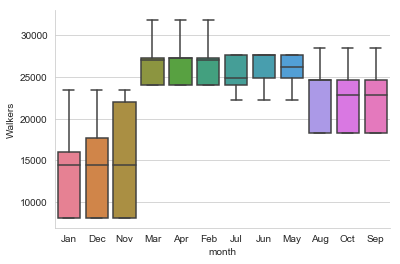

In [16]:


sns.set_style("whitegrid")
#sns.boxplot(x="month", y="Walkers", data = df_Walking_Club)
sns.boxplot(x="month", y="Walkers", data=df_Walking_Club, palette="husl")
sns.despine()
plt.show()

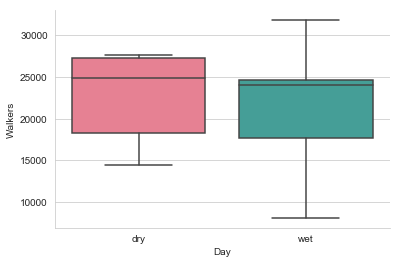

In [17]:

sns.set_style("whitegrid")
#sns.boxplot(x="month", y="Walkers", data = df_Walking_Club)
sns.boxplot(x="Day", y="Walkers", data=df_Walking_Club, palette="husl")
sns.despine()
plt.show()

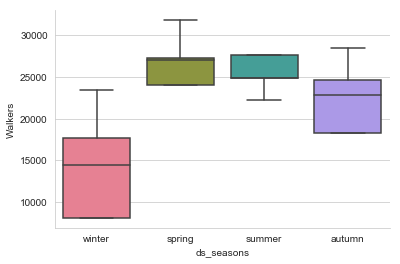

In [18]:

sns.set_style("whitegrid")
#sns.boxplot(x="month", y="Walkers", data = df_Walking_Club)
sns.boxplot(x="ds_seasons", y="Walkers", data=df_Walking_Club, palette="husl")
sns.despine()
plt.show()

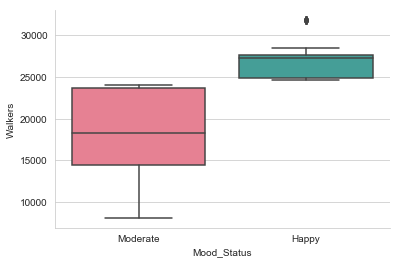

In [19]:

sns.set_style("whitegrid")
#sns.boxplot(x="month", y="Walkers", data = df_Walking_Club)
sns.boxplot(x="Mood_Status", y="Walkers", data=df_Walking_Club, palette="husl")
sns.despine()
plt.show()